In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random
from time import sleep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from keras.layers.convolutional import Conv1D 
from keras.layers import GlobalMaxPooling1D

In [2]:
dirC='./Datasets/setC/'
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)
dirE='./Datasets/setE/'
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tempC

['./Datasets/setC/N001.TXT',
 './Datasets/setC/N002.TXT',
 './Datasets/setC/N003.TXT',
 './Datasets/setC/N004.TXT',
 './Datasets/setC/N005.TXT',
 './Datasets/setC/N006.TXT',
 './Datasets/setC/N007.TXT',
 './Datasets/setC/N008.TXT',
 './Datasets/setC/N009.TXT',
 './Datasets/setC/N010.TXT',
 './Datasets/setC/N011.TXT',
 './Datasets/setC/N012.TXT',
 './Datasets/setC/N013.TXT',
 './Datasets/setC/N014.TXT',
 './Datasets/setC/N015.TXT',
 './Datasets/setC/N016.TXT',
 './Datasets/setC/N017.TXT',
 './Datasets/setC/N018.TXT',
 './Datasets/setC/N019.TXT',
 './Datasets/setC/N020.TXT',
 './Datasets/setC/N021.TXT',
 './Datasets/setC/N022.TXT',
 './Datasets/setC/N023.TXT',
 './Datasets/setC/N024.TXT',
 './Datasets/setC/N025.TXT',
 './Datasets/setC/N026.TXT',
 './Datasets/setC/N027.TXT',
 './Datasets/setC/N028.TXT',
 './Datasets/setC/N029.TXT',
 './Datasets/setC/N030.TXT',
 './Datasets/setC/N031.TXT',
 './Datasets/setC/N032.TXT',
 './Datasets/setC/N033.TXT',
 './Datasets/setC/N034.TXT',
 './Datasets/s

In [4]:
tempE

['./Datasets/setE/S001.txt',
 './Datasets/setE/S002.txt',
 './Datasets/setE/S003.txt',
 './Datasets/setE/S004.txt',
 './Datasets/setE/S005.txt',
 './Datasets/setE/S006.txt',
 './Datasets/setE/S007.txt',
 './Datasets/setE/S008.txt',
 './Datasets/setE/S009.txt',
 './Datasets/setE/S010.txt',
 './Datasets/setE/S011.txt',
 './Datasets/setE/S012.txt',
 './Datasets/setE/S013.txt',
 './Datasets/setE/S014.txt',
 './Datasets/setE/S015.txt',
 './Datasets/setE/S016.txt',
 './Datasets/setE/S017.txt',
 './Datasets/setE/S018.txt',
 './Datasets/setE/S019.txt',
 './Datasets/setE/S020.txt',
 './Datasets/setE/S021.txt',
 './Datasets/setE/S022.txt',
 './Datasets/setE/S023.txt',
 './Datasets/setE/S024.txt',
 './Datasets/setE/S025.txt',
 './Datasets/setE/S026.txt',
 './Datasets/setE/S027.txt',
 './Datasets/setE/S028.txt',
 './Datasets/setE/S029.txt',
 './Datasets/setE/S030.txt',
 './Datasets/setE/S031.txt',
 './Datasets/setE/S032.txt',
 './Datasets/setE/S033.txt',
 './Datasets/setE/S034.txt',
 './Datasets/s

In [5]:
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [6]:
tc

[      A0
 0    -42
 1    -39
 2    -35
 3    -35
 4    -36
 ...   ..
 4092 -22
 4093 -29
 4094 -37
 4095 -40
 4096 -64
 
 [4097 rows x 1 columns],
       A1
 0     50
 1     48
 2     45
 3     41
 4     47
 ...   ..
 4092 -25
 4093 -19
 4094 -14
 4095  -9
 4096 -37
 
 [4097 rows x 1 columns],
       A2
 0    -54
 1    -56
 2    -57
 3    -63
 4    -60
 ...   ..
 4092 -43
 4093 -33
 4094 -38
 4095 -42
 4096   5
 
 [4097 rows x 1 columns],
       A3
 0      9
 1     -2
 2     -9
 3    -17
 4    -18
 ...   ..
 4092  70
 4093  72
 4094  67
 4095  65
 4096 -31
 
 [4097 rows x 1 columns],
        A4
 0     -76
 1     -10
 2      31
 3      44
 4       7
 ...   ...
 4092  185
 4093  245
 4094  209
 4095  150
 4096  -51
 
 [4097 rows x 1 columns],
        A5
 0    -148
 1    -155
 2    -156
 3    -156
 4    -150
 ...   ...
 4092  -81
 4093  -80
 4094  -81
 4095  -77
 4096   95
 
 [4097 rows x 1 columns],
       A6
 0    -27
 1    -26
 2    -19
 3    -13
 4     -8
 ...   ..
 4092 -79
 4093 -8

In [7]:
te

[       A0
 0     100
 1     124
 2     153
 3     185
 4     210
 ...   ...
 4092    7
 4093   26
 4094   57
 4095   95
 4096  462
 
 [4097 rows x 1 columns],
        A1
 0     340
 1     353
 2     400
 3     470
 4     538
 ...   ...
 4092  829
 4093  722
 4094  512
 4095  130
 4096  196
 
 [4097 rows x 1 columns],
        A2
 0    -310
 1      93
 2     494
 3     789
 4     798
 ...   ...
 4092 -735
 4093 -847
 4094 -721
 4095 -491
 4096  910
 
 [4097 rows x 1 columns],
        A3
 0      84
 1      75
 2      21
 3     -68
 4    -138
 ...   ...
 4092 -234
 4093 -238
 4094 -209
 4095 -165
 4096 -212
 
 [4097 rows x 1 columns],
        A4
 0     343
 1     311
 2     284
 3     274
 4     260
 ...   ...
 4092  515
 4093  527
 4094  480
 4095  397
 4096  217
 
 [4097 rows x 1 columns],
        A5
 0     -88
 1    -115
 2    -140
 3    -159
 4    -164
 ...   ...
 4092  153
 4093  150
 4094  146
 4095  140
 4096  191
 
 [4097 rows x 1 columns],
        A6
 0     176
 1     186
 2     

In [8]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [9]:
bigC=table(tc)
bigE=table(te)

head=list(bigC.columns.values)

In [10]:
len(bigC.columns)

100

In [11]:
bigC

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-42,50,-54,9,-76,-148,-27,-64,74,-41,...,7,-108,-11,133,38,-92,-82,-11,13,-62
1,-39,48,-56,-2,-10,-155,-26,-73,92,-35,...,30,-120,-9,129,56,-85,-82,-23,22,-64
2,-35,45,-57,-9,31,-156,-19,-79,94,-28,...,16,-137,-11,124,75,-68,-83,-22,29,-62
3,-35,41,-63,-17,44,-156,-13,-78,99,-23,...,10,-132,-8,102,85,-67,-82,-31,38,-59
4,-36,47,-60,-18,7,-150,-8,-80,91,-20,...,17,-113,-4,99,83,-99,-79,-30,41,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,-22,-25,-43,70,185,-81,-79,-36,-4,8,...,-98,82,13,-24,-49,8,-78,21,-83,1
4093,-29,-19,-33,72,245,-80,-82,-31,-17,8,...,-52,68,14,4,-53,-3,-72,22,-67,1
4094,-37,-14,-38,67,209,-81,-78,-34,-11,2,...,-33,26,9,26,-52,-20,-73,16,-55,-1
4095,-40,-9,-42,65,150,-77,-72,-39,-14,-7,...,-58,-3,13,37,-54,-16,-65,13,-46,0


In [12]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [13]:
matC=creat_mat(bigC)
matE=creat_mat(bigE)

In [14]:
matC=np.nan_to_num(matC)
matE=np.nan_to_num(matE)

In [15]:
matC.shape,matE.shape

((4097, 100), (4097, 100))

In [16]:
matC

array([[-42.,  50., -54., ..., -11.,  13., -62.],
       [-39.,  48., -56., ..., -23.,  22., -64.],
       [-35.,  45., -57., ..., -22.,  29., -62.],
       ...,
       [-37., -14., -38., ...,  16., -55.,  -1.],
       [-40.,  -9., -42., ...,  13., -46.,   0.],
       [-64., -37.,   5., ..., -29.,  -2.,  41.]])

In [17]:
matE

array([[ 100.,  340., -310., ..., -438., -476.,   23.],
       [ 124.,  353.,   93., ..., -561., -518.,  144.],
       [ 153.,  400.,  494., ..., -622., -521.,  228.],
       ...,
       [  57.,  512., -721., ..., -118.,  246., -155.],
       [  95.,  130., -491., ..., -163.,  556.,    6.],
       [ 462.,  196.,  910., ...,  -56.,  276., -221.]])

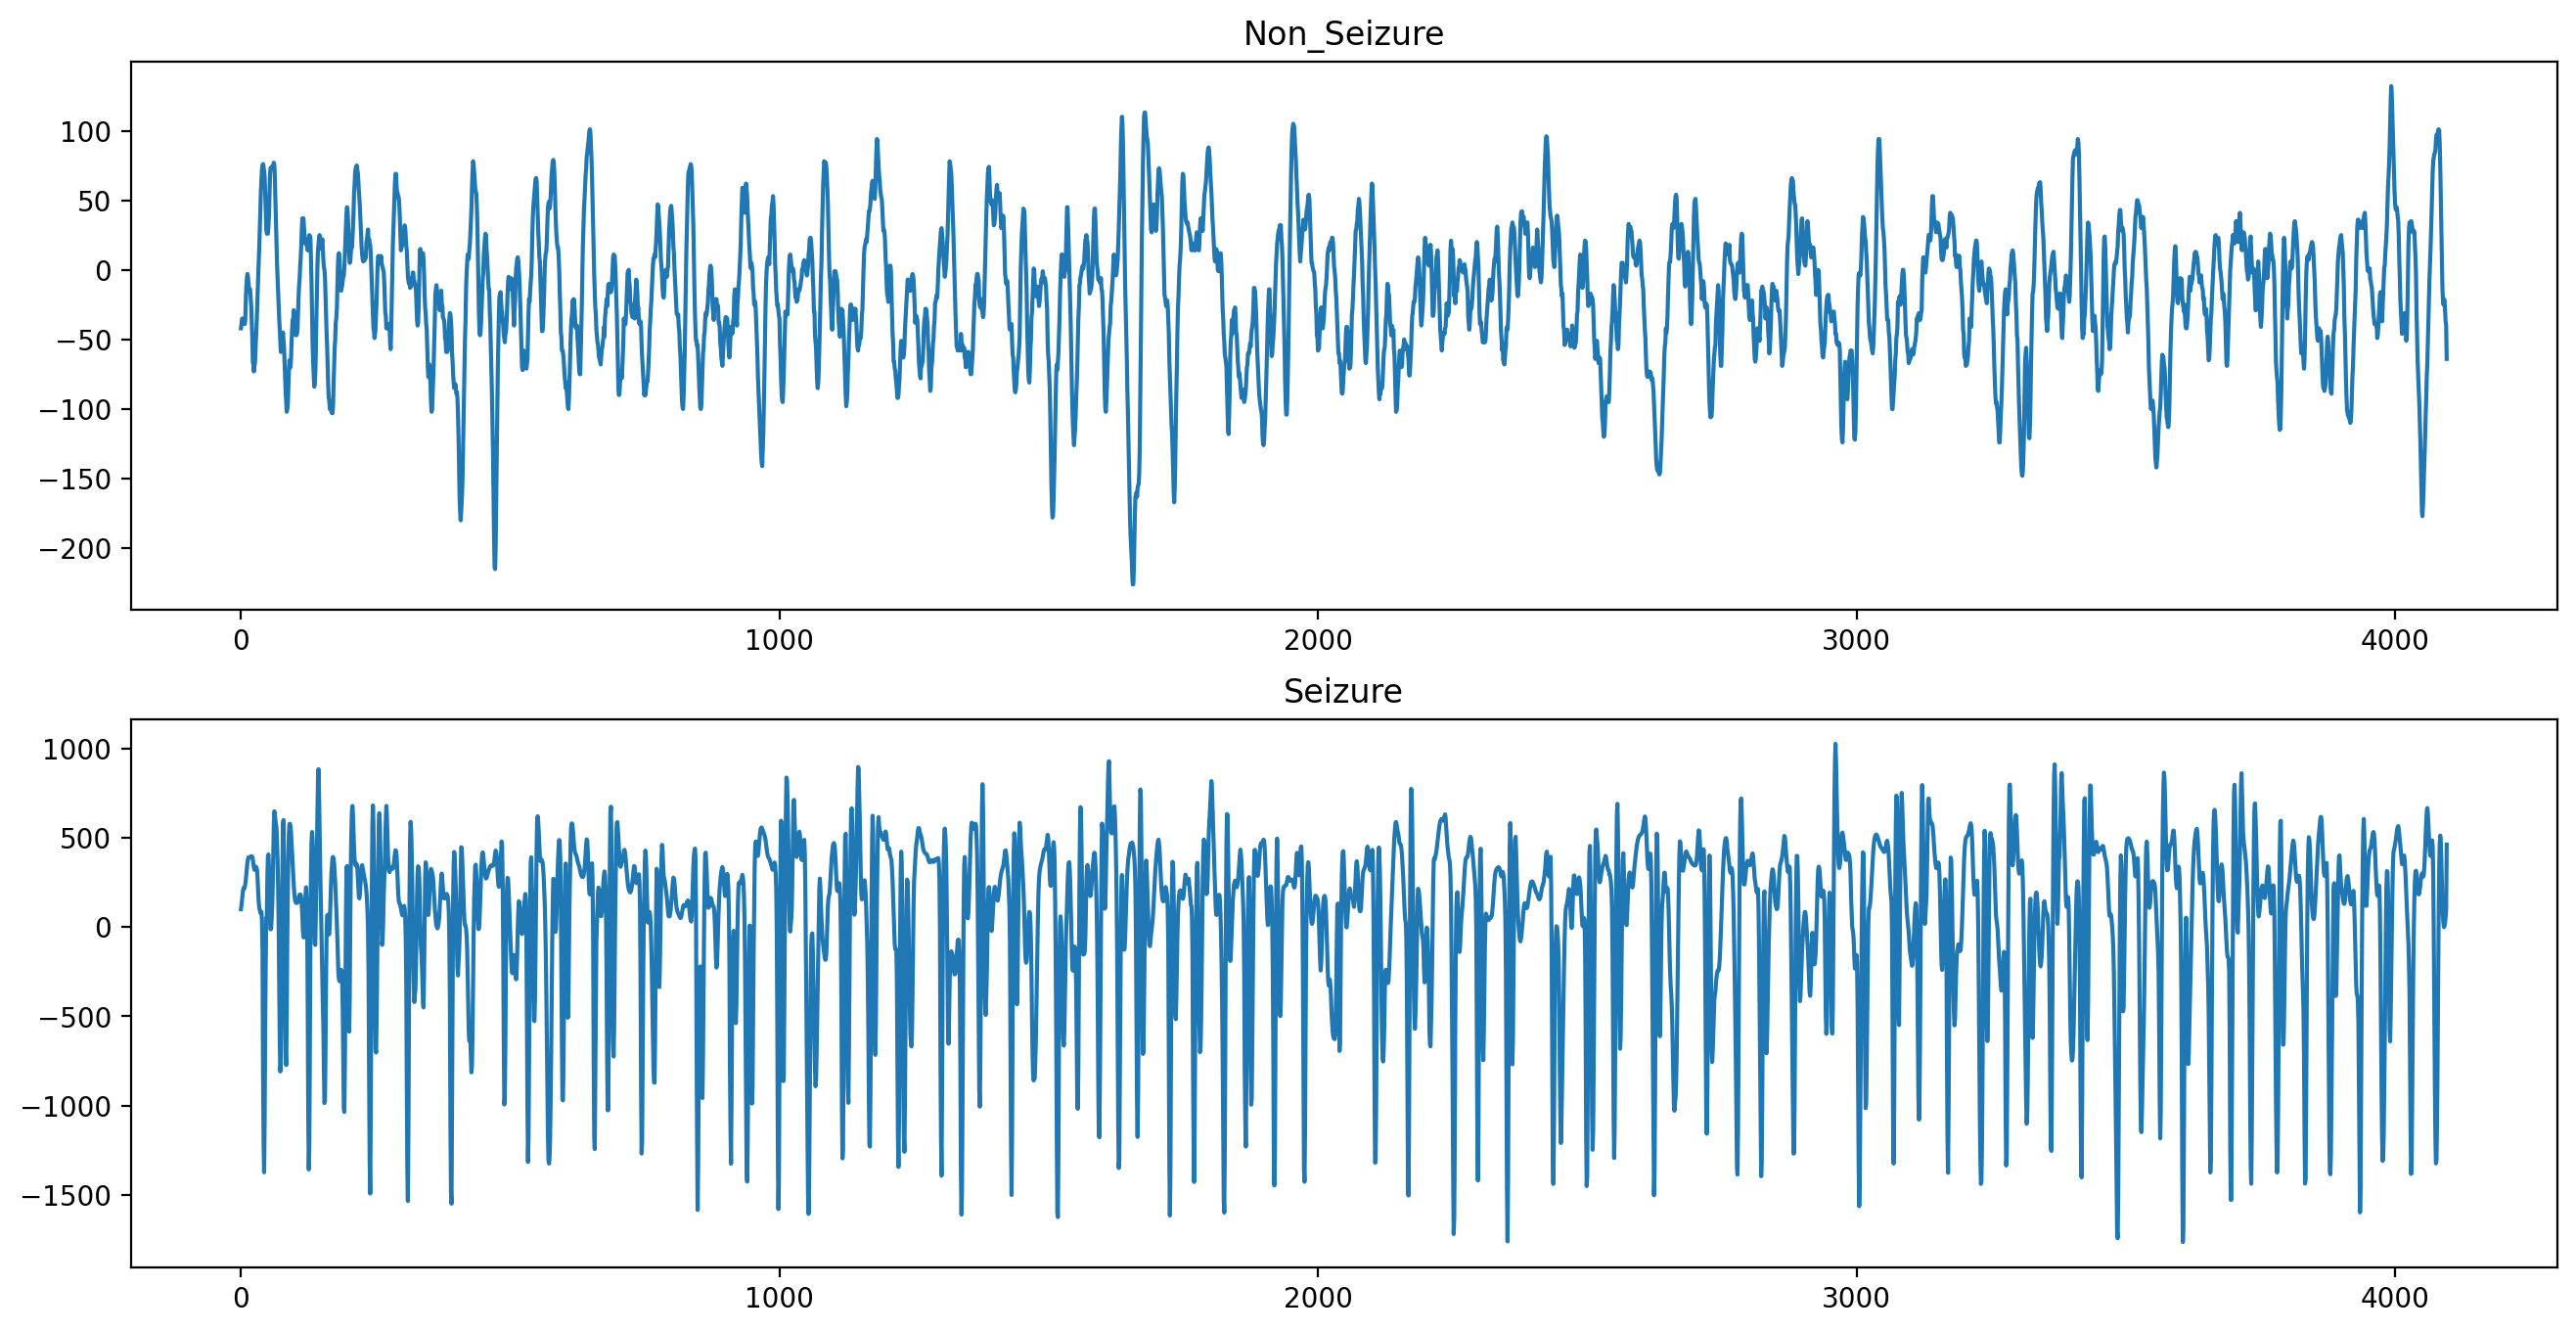

In [18]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8),dpi=200)
plt.subplot(2,1,1)
plt.title('Non_Seizure')
plt.plot(samples,matC[:,0],label='Non_Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label='Seizure')
plt.show()

In [19]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [20]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [21]:
MftC = np.zeros((100,feature_size + 1))
for i in range(100):
    MftC[i,:] = features(matC[:,i]) + [1]

In [22]:
MftE = np.zeros((100,feature_size + 1))
for i in range(100):
    MftE[i,:] = features(matE[:,i]) + [0]

In [23]:
len(MftC),len(MftE)

(100, 100)

In [24]:
FCM_C = pd.DataFrame(MftC,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)

In [25]:
TotalDataset = pd.concat([FCM_C,FCM_E],ignore_index=True)

In [26]:
TotalDataset

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,72886.000000,4.740101,1162.631842,3148.603055,515.780251,3.827455,139.383073,79.320372,1.0
1,44488.190982,5.245204,1574.842502,3976.913262,782.890148,6.272206,165.048007,101.066014,1.0
2,60280.000000,3.558463,1187.368357,2836.556431,442.146657,2.203469,125.845383,72.975137,1.0
3,114634.000000,2.802925,1178.967729,3257.123132,516.340677,4.296319,158.979411,76.421653,1.0
4,73980.472922,29.009750,3844.764474,7038.394713,1321.432376,12.411132,319.865458,171.761400,1.0
...,...,...,...,...,...,...,...,...,...
195,182731.000000,4.140197,2964.034370,6900.671072,949.526909,7.628541,321.787517,169.284739,0.0
196,405933.567827,23.829796,12451.110052,33118.177387,3365.057684,584.042975,1497.708540,566.344367,0.0
197,206553.768555,13.807308,7000.972903,17431.403312,1554.877011,70.801519,785.302431,325.527149,0.0
198,186015.216714,22.248840,12069.225734,21179.101425,3292.508700,22.389188,897.583539,643.899324,0.0


In [27]:
x = TotalDataset[columns_name[:-1]]
y = TotalDataset[['class']]
x = np.asarray(x)
y = np.asarray(y)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train) 

In [30]:
x_test= st_x.transform(x_test)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8)
(40, 8)
(160, 1)
(40, 1)


In [32]:
x_train=x_train.reshape(x_train.shape[0],8,1)
y_train=y_train.reshape(y_train.shape[0],1)
x_test=x_test.reshape(x_test.shape[0],8,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8, 1)
(40, 8, 1)
(160, 1)
(40, 1)


In [34]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(8, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(150))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())
history=model.fit(x_train, y_train, batch_size = 64, epochs = 100)
score=model.evaluate(x_test,y_test,batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             128       
                                                                 
 lstm (LSTM)                 (None, 6, 64)             24832     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 150)               9750      
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 34,861
Trainable params: 34,861
Non-trainable params: 0
____________________________________________________

3/3 [==============================] - 0s 11ms/step - loss: 0.0194 - accuracy: 0.9875
Epoch 73/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0199 - accuracy: 0.9875
Epoch 74/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0195 - accuracy: 0.9875
Epoch 75/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0195 - accuracy: 0.9875
Epoch 76/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0195 - accuracy: 0.9875
Epoch 77/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0184 - accuracy: 0.9875
Epoch 78/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0194 - accuracy: 0.9875
Epoch 79/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0185 - accuracy: 0.9875
Epoch 80/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0200 - accuracy: 0.9875
Epoch 81/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0186 - accuracy: 0.9875
Epoch 82/100
3/3 [=====

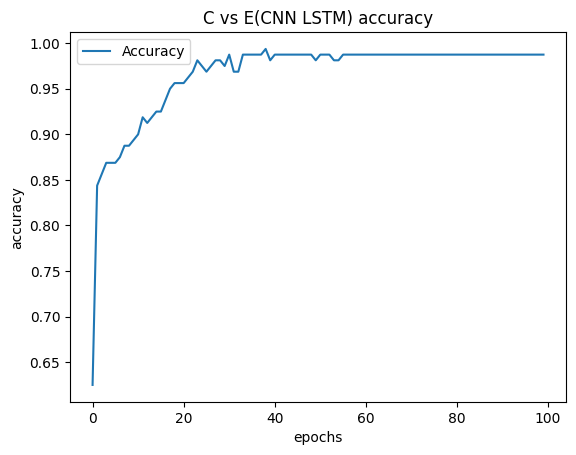

In [35]:
plt.plot(history.history['accuracy'])
plt.title('C vs E(CNN LSTM) accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy'],loc='best')
plt.savefig('11-CvsE(CNN LSTM)_Accuracy.png')
plt.show()

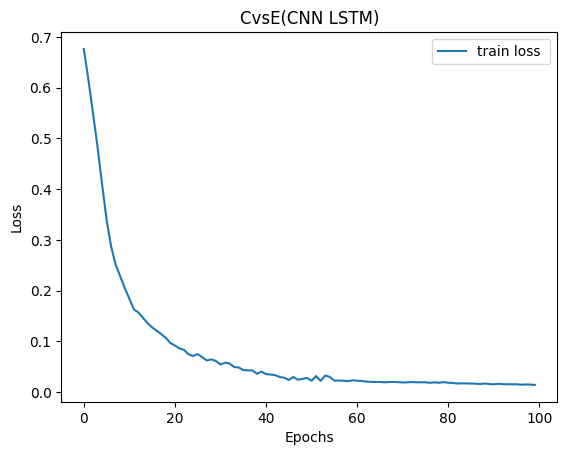

In [36]:
plt.plot(history.history['loss'])
plt.title('CvsE(CNN LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train loss ','val loss'],loc='best')
plt.savefig('11-CvsE(CNN LSTM)_Loss.png')
plt.show()

In [37]:
y_pred=model.predict(x_test).round()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 1s 2ms/step
Accuracy: 100.00%


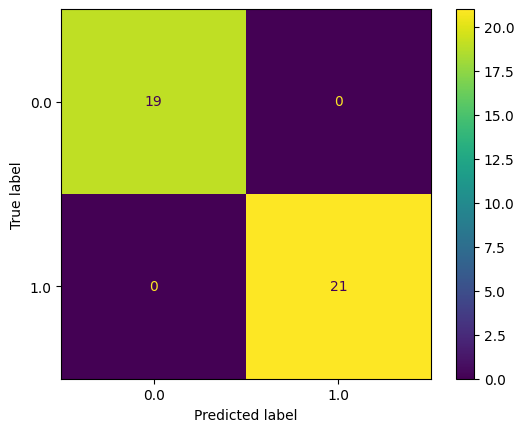

In [38]:
actual=y_test
predicted=y_pred
onfusion_matrix = metrics.confusion_matrix(actual, predicted)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.savefig('11-CvsE(CNN LSTM)_ConfusionMatrix.png')
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

